# AnomalyDetection_1_ExploringData

The first part of the project (separating significant movements from non-significant ones) has been complete, with the following condition having been found:

$$ M =\begin{cases} 
      -1 & g_ig_i > p\left(\frac{1}{\dot{\theta_i}\dot{\theta_i}}\right)\\
      1 & g_ig_i\leq p\left(\frac{1}{\dot{\theta_i}\dot{\theta_i}}\right) \\
   \end{cases}
$$

$$p(x_i) = C_ix_i$$

$$ C_i = \begin{pmatrix}
0.7741697399557282\\
-0.15839741967042406\\
0.09528795099596377\\
-0.004279871380772796
\end{pmatrix} \,\, \mathrm{and} \,\,  x_i = \begin{pmatrix}
x^4\\
x^2\\
x\\
1
\end{pmatrix} $$

On the assumption that this is a good model (ideally given more resources and time, more elaborate testing would have been carried out), the goal now is to find anomalies in time series of the significant movements.

## Libraries and Configuration

In [1]:
""" Libraries """

#file / system libraries 
import os
import datetime as dt

# mathematical 

import numpy as np

# data exploration

import pandas as pd

# data visualization

import matplotlib.pyplot as plt

""" Configuration """

# pandas 

pd.set_option('display.max_columns', None)

## Functions

In [2]:
def polynomial(x):
    """ takes an array and returns it after our polynomial function has been applied to it"""
    C = [0.7741697399557282,-0.15839741967042406,0.09528795099596377,-0.004279871380772796]
    y = C[0]*np.power(x,4)+C[1]*np.power(x,2)+C[2]*x+C[3]
    return y

def directory_to_df(paths, exclude = [None], filetype = '.csv',ignore_index = True, exception = '_repet'):
    """ concatenates all files in a directory into a dataframe
    components:
    path: path to the directory (must end with /)
    exclude: array of directories to excludes from the treatment
    filetype: a string of the file extension (must include .)
    ignore_index: boolean that tells pandas to ignore the index or not
    exception: takes a string. Any time a filename includes this string it is treated differently (for cases when you have
    more than one ) 
    """
    filenames = []
    file_column = []
    frames = []
    test_index = 1
    
    for path in paths:
        for filename in os.listdir(path):
            print(path)
            if filetype in filename and filename not in exclude:
                if exception in filename:
                    curr_df = pd.read_csv(path+filename)
                    curr_df = special_treatment(curr_df)
                    
                else:
                    curr_df = pd.read_csv(path+filename)                    
                frames.append(curr_df)
                filenames.append(filename.replace(filetype,''))
                for i in range(curr_df.shape[0]):
                    file_column.append(test_index)
                test_index+=1

    df = pd.concat(frames,ignore_index = ignore_index)
    df['files'] = file_column
    return df, filenames


def special_treatment(df):
    """ performs a custom operation on a dataframe
    components:
    df: dataframe to play on
    """
    columns = df.columns.values.tolist()
    columns.remove('date')
    df.drop('gyrZ',inplace = True, axis = 1)
    df.columns = columns
    df.reset_index(inplace = True)
    df.rename(columns= {'index':'date'},inplace = True)
    return df

## Data

In [3]:
base = '/Users/yousefnami/KinKeepers/ProjectAI/Kin-Keepers/Data/{}'
paths = [base.format('Rohan/'),base.format('Ignacio/')]
frames = []

for index,path in enumerate(paths):
    frames.append(directory_to_df([path]))
    frames[index][0]['accTotal'] =  np.sqrt(np.power(frames[index][0][['accX','accY','accZ']],2).sum(axis = 1))
    frames[index][0]['gyrTotal'] =  np.sqrt(np.power(frames[index][0][['gyrX','gyrY','gyrZ']],2).sum(axis = 1))


    
df_rohan = frames[0][0]
df_ignacio = frames[1][0]

dfs = []
dfs.append(df_rohan)
dfs.append(df_ignacio)

/Users/yousefnami/KinKeepers/ProjectAI/Kin-Keepers/Data/Rohan/
/Users/yousefnami/KinKeepers/ProjectAI/Kin-Keepers/Data/Rohan/
/Users/yousefnami/KinKeepers/ProjectAI/Kin-Keepers/Data/Rohan/
/Users/yousefnami/KinKeepers/ProjectAI/Kin-Keepers/Data/Rohan/
/Users/yousefnami/KinKeepers/ProjectAI/Kin-Keepers/Data/Ignacio/
/Users/yousefnami/KinKeepers/ProjectAI/Kin-Keepers/Data/Ignacio/
/Users/yousefnami/KinKeepers/ProjectAI/Kin-Keepers/Data/Ignacio/
/Users/yousefnami/KinKeepers/ProjectAI/Kin-Keepers/Data/Ignacio/
/Users/yousefnami/KinKeepers/ProjectAI/Kin-Keepers/Data/Ignacio/
/Users/yousefnami/KinKeepers/ProjectAI/Kin-Keepers/Data/Ignacio/


In [4]:
df_rohan

,date,accX,accY,accZ,gyrX,gyrY,gyrZ,files,accTotal,gyrTotal
0,2020-09-14 19:16:45,0.00,0.00,0.00,1.46,0.47,1.39,1,0.000000,2.069928
1,2020-09-14 19:16:46,0.00,0.00,0.00,1.07,0.47,1.38,1,0.000000,1.808369
2,2020-09-14 19:16:46,0.01,0.00,0.00,1.07,0.47,1.38,1,0.010000,1.808369
3,2020-09-14 19:16:47,0.00,0.00,0.00,1.05,0.25,1.40,1,0.000000,1.767767
4,2020-09-14 19:16:48,0.00,0.00,0.00,0.83,0.10,1.41,1,0.000000,1.639207
...,...,...,...,...,...,...,...,...,...,...
31311,2020-09-09 18:04:12,0.03,-0.03,0.05,-3.88,3.52,-6.43,4,0.065574,8.293956
31312,2020-09-09 18:04:13,0.01,0.01,0.00,-2.91,-1.91,-2.85,4,0.014142,4.498744
31313,2020-09-09 18:04:13,0.00,0.03,-0.05,-122.00,5.52,-0.07,4,0.058310,122.124835
31314,2020-09-09 18:04:14,-0.10,0.05,0.20,-26.89,38.96,29.60,4,0.229129,55.831118


In [5]:
df_ignacio

,date,accX,accY,accZ,gyrX,gyrY,gyrZ,files,accTotal,gyrTotal
0,2020-09-13 17:09:25,0.02,0.12,0.03,1.47,3.32,2.22,1,0.125300,4.255784
1,2020-09-13 17:09:26,0.02,0.12,0.03,1.47,3.32,2.22,1,0.125300,4.255784
2,2020-09-13 17:09:27,0.01,0.01,0.00,7.43,6.82,10.10,1,0.014142,14.273307
3,2020-09-13 17:09:27,0.01,0.01,0.00,1.52,1.51,2.05,1,0.014142,2.965299
4,2020-09-13 17:09:28,0.00,0.00,0.00,1.52,1.51,2.05,1,0.000000,2.965299
...,...,...,...,...,...,...,...,...,...,...
46395,2020-09-19 23:40:09,0.00,0.01,0.00,1.86,1.56,0.66,4,0.010000,2.515711
46396,2020-09-19 23:40:10,0.01,0.01,0.00,1.86,1.56,0.66,4,0.014142,2.515711
46397,2020-09-19 23:40:11,0.00,0.00,0.00,1.47,1.58,1.04,4,0.000000,2.395600
46398,2020-09-19 23:40:11,0.00,0.00,0.00,0.86,0.94,0.32,4,0.000000,1.313621


In [6]:
for df in dfs:
    df.date = pd.to_datetime(df.date)
    times = []
    
    # this is good, but you must apply it for EACH day
    for index,time in enumerate(df.date.values):
        if index == 0:
            times.append((time - time)/np.timedelta64(1, 's'))
        else:
            times.append((time - df.date.values[0])/np.timedelta64(1, 's'))
    df['times'] = times
print('time',type(time))
print('value',type(df.date.values[0]))
df_ignacio.head()

time <class 'numpy.datetime64'>
value <class 'numpy.datetime64'>


,date,accX,accY,accZ,gyrX,gyrY,gyrZ,files,accTotal,gyrTotal,times
0,2020-09-13 17:09:25,0.02,0.12,0.03,1.47,3.32,2.22,1,0.125300,4.255784,0.0
1,2020-09-13 17:09:26,0.02,0.12,0.03,1.47,3.32,2.22,1,0.125300,4.255784,1.0
2,2020-09-13 17:09:27,0.01,0.01,0.00,7.43,6.82,10.10,1,0.014142,14.273307,2.0
3,2020-09-13 17:09:27,0.01,0.01,0.00,1.52,1.51,2.05,1,0.014142,2.965299,2.0
4,2020-09-13 17:09:28,0.00,0.00,0.00,1.52,1.51,2.05,1,0.000000,2.965299,3.0


In [7]:
class seasonality():
    """ takes in a dataframe, outputting it with two extra columns: seasonality (but column name = seasonality
    inputted) and times, where 'times' is a plottable version of date with reference to a prespecified start time
    (day_start)
    Components:
    df: the dataframe, must have the dates column as 'date' and in np.datetime64 timeformat
    seasonality (optional): defaults to 'day'. This is the criteria for splitting the data
    day_start (optional): this signifies what is the 'start time' of the day (i.e. the 0 point on the x axis). Defaults
    for midnight.
    time_delta (optional): this defines the units for the time delta between data points. Defaults to seconds.
    EDIT THIS MSG
    """ 
    def __init__(self,df,seasonality='day',day_start = '00:00:00', time_delta = 's'):
        
        if seasonality not in ['day','month','year']:
            raise ValueError("you can only input the following for seasonality: 'day', 'month', or 'year'")
        self.df = df
        self.seasonality = 'seasonality_{}'.format(seasonality)
        try:
            self.day_start = dt.datetime.strptime(day_start,'%H:%M:%S')
        except:
            raise ValueError('Please enter your day_start in the correct format: "HH:MM:SS". "{}" is not acceptable'\
                             .format(day_start))
        self.time_delta = time_delta

    def find_seasonal_trends(self):
        if 'day' in self.seasonality:
            self.df[self.seasonality] = self.df.date.dt.day
        elif 'month' in self.seasonality:
            self.df[self.seasonality] = self.df.date.dt.month
        else:
            self.df[self.seasonality] = self.df.date.dt.year
            
        self.create_times()


        return self.df
    
    def create_times(self):
        times = []
        for season in self.df[self.seasonality].unique():
            temp_dates = self.df.date[self.df[self.seasonality] == season].values
            date = dt.datetime.strptime(str(temp_dates[0])[:-3], '%Y-%m-%dT%H:%M:%S.%f')
            start_day = dt.datetime(date.year,
                                    date.month,
                                    date.day,
                                    self.day_start.hour,
                                    self.day_start.minute,
                                    self.day_start.second)
            start_day = np.datetime64(start_day)
            
            for index, date in enumerate(temp_dates):
                times.append((date - start_day)/np.timedelta64(1, self.time_delta))
        print(len(times))
        self.df['times'] = times

In [14]:

df_temp = df_ignacio
#df_temp.date = pd.to_datetime(df_temp.date)

myObj = seasonality(df_temp,time_delta = 'm')
print(myObj.day_start)


df_temp = myObj.find_seasonal_trends()

#df_ignacio = find_seasonal_trends(df_ignacio,seasonality = 'month')
#df_ignacio.date.dt.day
#df_ignacio.head()
df_temp.head()

1900-01-01 00:00:00
46400


,date,accX,accY,accZ,gyrX,gyrY,gyrZ,files,accTotal,gyrTotal,times,seasonality_day
0,2020-09-13 17:09:25,0.02,0.12,0.03,1.47,3.32,2.22,1,0.125300,4.255784,1029.416667,13
1,2020-09-13 17:09:26,0.02,0.12,0.03,1.47,3.32,2.22,1,0.125300,4.255784,1029.433333,13
2,2020-09-13 17:09:27,0.01,0.01,0.00,7.43,6.82,10.10,1,0.014142,14.273307,1029.450000,13
3,2020-09-13 17:09:27,0.01,0.01,0.00,1.52,1.51,2.05,1,0.014142,2.965299,1029.450000,13
4,2020-09-13 17:09:28,0.00,0.00,0.00,1.52,1.51,2.05,1,0.000000,2.965299,1029.466667,13


In [9]:
for df in dfs:
    seasonal = seasonality(df)
    df = seasonal.find_seasonal_trends()
    
df_rohan = dfs[0]
df_ignacio = dfs[1]

31316
46400


In [10]:
df_rohan.head()

,date,accX,accY,accZ,gyrX,gyrY,gyrZ,files,accTotal,gyrTotal,times,seasonality_day
0,2020-09-14 19:16:45,0.00,0.0,0.0,1.46,0.47,1.39,1,0.00,2.069928,69405.0,14
1,2020-09-14 19:16:46,0.00,0.0,0.0,1.07,0.47,1.38,1,0.00,1.808369,69406.0,14
2,2020-09-14 19:16:46,0.01,0.0,0.0,1.07,0.47,1.38,1,0.01,1.808369,69406.0,14
3,2020-09-14 19:16:47,0.00,0.0,0.0,1.05,0.25,1.40,1,0.00,1.767767,69407.0,14
4,2020-09-14 19:16:48,0.00,0.0,0.0,0.83,0.10,1.41,1,0.00,1.639207,69408.0,14


In [11]:
df_ignacio.head()

,date,accX,accY,accZ,gyrX,gyrY,gyrZ,files,accTotal,gyrTotal,times,seasonality_day
0,2020-09-13 17:09:25,0.02,0.12,0.03,1.47,3.32,2.22,1,0.125300,4.255784,61765.0,13
1,2020-09-13 17:09:26,0.02,0.12,0.03,1.47,3.32,2.22,1,0.125300,4.255784,61766.0,13
2,2020-09-13 17:09:27,0.01,0.01,0.00,7.43,6.82,10.10,1,0.014142,14.273307,61767.0,13
3,2020-09-13 17:09:27,0.01,0.01,0.00,1.52,1.51,2.05,1,0.014142,2.965299,61767.0,13
4,2020-09-13 17:09:28,0.00,0.00,0.00,1.52,1.51,2.05,1,0.000000,2.965299,61768.0,13


83605.0
85212.0


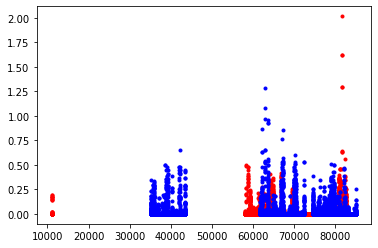

In [13]:
colors = ['r','b']
for df,color in zip(dfs,colors):
    plt.plot(df.times,df.accTotal,'{}.'.format(color))
    print(df.times.max())